In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
# os.listdir("../input")
from sklearn.metrics import confusion_matrix, classification_report

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('Hotel_Reviews.csv')
#df.head()
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [3]:
df['reviews'] = df['Negative_Review'] + df['Positive_Review']

In [4]:
# remove 'No Negative' or 'No Positive' from text
df["reviews"] = df["reviews"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [5]:
import numpy as np



# Set review score < 5 to 1(unhappy), 10 to be 0 (happy) and the rest to be 2. 

df["is_bad_review"] = df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else (0 if x==10 else 2))


# Include only the sentiment and reviews columns
data = df[['is_bad_review', 'reviews']]
data.head()
data = df[df.is_bad_review!=2]
data
data = data[['is_bad_review', 'reviews']]
data.reset_index(drop=True, inplace = True)
data

,is_bad_review,reviews
0,1,I am so angry that i made this post available...
1,1,My room was dirty and I was afraid to walk ba...
2,1,Cleaner did not change our sheet and duvet ev...
3,0,Apart from the price for the brekfast Everyth...
4,0,Nothing all great Rooms were stunningly deco...
...,...,...
138129,0,room was a bit small but it s OK Bed was goo...
138130,1,Everything Nothing
138131,0,The breakfast was excelent lots of fress frui...
138132,0,helpful staff allowed me to check in early as...


In [6]:
data = data.sample(frac = 0.1, replace = False, random_state=42)
data

,is_bad_review,reviews
54591,0,Nothing The man in reception was really polit...
4157,0,Snacks with drinks could have been better ins...
50392,0,There wasn t a thing that we didn t like Its...
122803,0,Atmosphere
14231,1,Staff at reception seemed to lack training ve...
...,...,...
103438,0,Could have provided more than 1 microwave Fr...
84867,0,My daughters requested a room service breakfa...
73321,0,Amazing location and lovely room with great s...
8464,1,not 4 star rude wifi


In [7]:
# Text preprocessing steps - remove numbers, capital letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['reviews'] = data.reviews.map(alphanumeric).map(punc_lower)
data.head()

,is_bad_review,reviews
54591,0,nothing the man in reception was really polit...
4157,0,snacks with drinks could have been better ins...
50392,0,there wasn t a thing that we didn t like its...
122803,0,atmosphere
14231,1,staff at reception seemed to lack training ve...


In [8]:
## Assign reviews input features as X and target is_bad_review as y 
from sklearn.feature_extraction.text import TfidfVectorizer

X=data['reviews']

y=data['is_bad_review']

In [9]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_break, X_test, y_break, y_test = train_test_split(X, y, \
                                                    test_size=0.2, stratify=y,
                                                    random_state=42)

#random_state generates a set kind of deck for each random state. 42 will always be the same kind of split
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.25, stratify=y_break,
                                                    random_state=42)


In [10]:
type(X_train)

pandas.core.series.Series

In [11]:
X_train = X_train.values.reshape(-1,1)

In [12]:
X_train.shape

(8287, 1)

In [13]:
X_val = X_val.values.reshape(-1,1)

In [14]:
X_val.shape

(2763, 1)

## Undersampling the imbalanced data

In [15]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
X_train_under, y_train_under = RandomUnderSampler(random_state=42).fit_sample(X_train,y_train)
X_val_under, y_val_under = RandomUnderSampler(random_state=42).fit_sample(X_val,y_val)
Counter(y_val_under)

Using TensorFlow backend.


Counter({0: 445, 1: 445})

In [16]:
Counter(y_train_under)

Counter({0: 1336, 1: 1336})

In [17]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train_under.ravel())
X_val_cv1  = cv1.transform(X_val_under.ravel())

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

,aaawas,aarangements,abadoneded,abd,ability,abit,able,abroad,abrupt,absolut,...,younger,youth,yrs,yummy,yuv,zero,zest,zone,zones,zullen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## A common preprocessing step in many NLP applications is stop-word removal. Common words like "a", "the", "and" often add a lot of noise, and don't typiccally contribute much to the task we are trying to solve.

## CountVectorizer also comes equipped with a way of dealing with common English stop words!

In [18]:
# The second document-term matrix has both unigrams and bigrams, and indicators instead of counts
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train_under.ravel())
X_val_cv2  = cv2.transform(X_val_under.ravel())

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

,aaawas,aaawas terrible,aarangements,aarangements requested,abadoneded,abadoneded builing,abd,abd easy,ability,ability disponibility,...,zero stars,zest,zest decided,zone,zone mood,zone old,zones,zones different,zullen,zullen terugkomen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [20]:
# Train the first model
lr.fit(X_train_cv1, y_train_under)
y_pred_cv1 = lr.predict(X_val_cv1)

In [21]:
# Train the second model
lr.fit(X_train_cv2, y_train_under)
y_pred_cv2 = lr.predict(X_val_cv2)

In [22]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]
    
    print('true_neg is ',true_neg)
    print('false_pos is ',false_pos)
    print('false_neg is ',false_neg)
    print('true_pos is ',true_pos)
    
    accuracy = round((true_pos + true_neg)*1.0 / (true_pos + true_neg + false_pos + false_neg),3)
    print('accuracy is ',accuracy)
    precision = round((true_pos)*1.0 / (true_pos + false_pos),3)
    print('precision is ',precision)
    recall = round((true_pos)*1.0 / (true_pos + false_neg),3)
    print('recall is ',recall)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

true_neg is  407
false_pos is  38
false_neg is  66
true_pos is  379
accuracy is  0.883
precision is  0.909
recall is  0.852


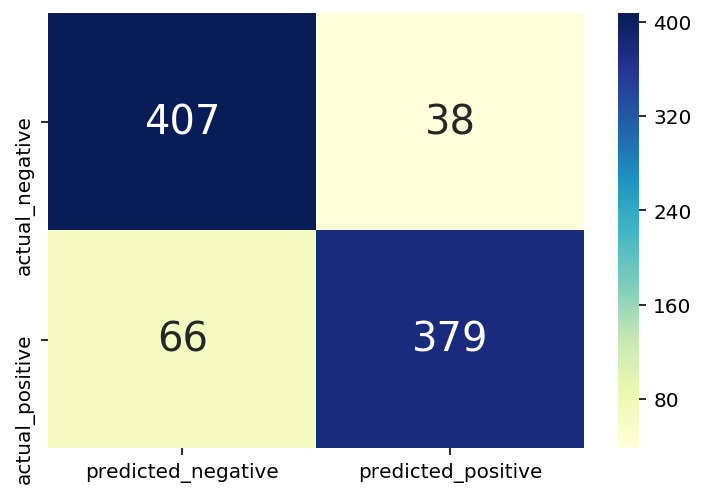

In [23]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_val_under, y_pred_cv1)

true_neg is  409
false_pos is  36
false_neg is  63
true_pos is  382
accuracy is  0.889
precision is  0.914
recall is  0.858


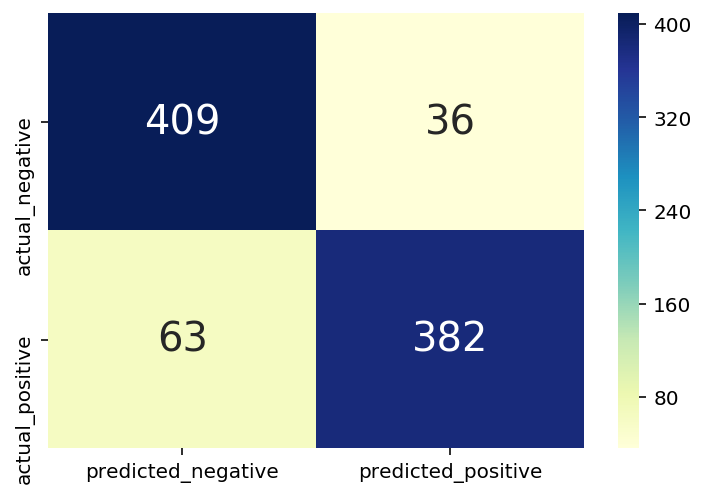

In [24]:
# The heat map for the second logistic regression model
cm2 = conf_matrix(y_val_under, y_pred_cv2)

In [25]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1', 'LogReg2']
results

,LogReg1,LogReg2
Accuracy,0.883,0.889
Precision,0.909,0.914
Recall,0.852,0.858
F1 Score,0.880,0.885


In [26]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train_under)

y_pred_cv1_nb = mnb.predict(X_val_cv1)

In [27]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train_under)

y_pred_cv2_nb = bnb.predict(X_val_cv2)

true_neg is  412
false_pos is  33
false_neg is  50
true_pos is  395
accuracy is  0.907
precision is  0.923
recall is  0.888


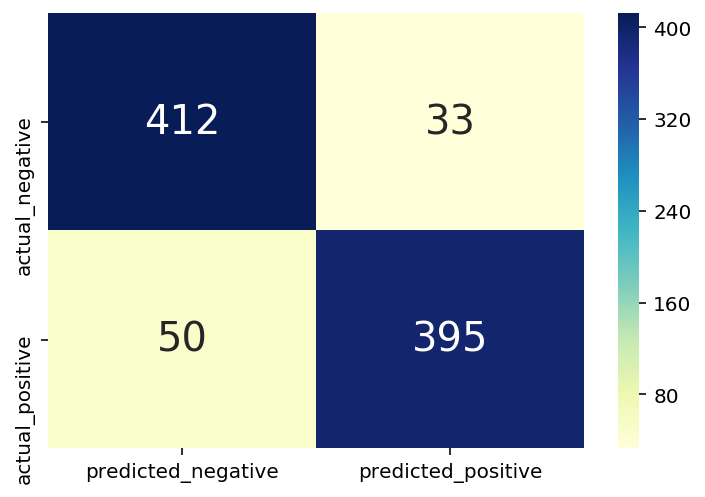

In [28]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_val_under, y_pred_cv1_nb)

true_neg is  444
false_pos is  1
false_neg is  242
true_pos is  203
accuracy is  0.727
precision is  0.995
recall is  0.456


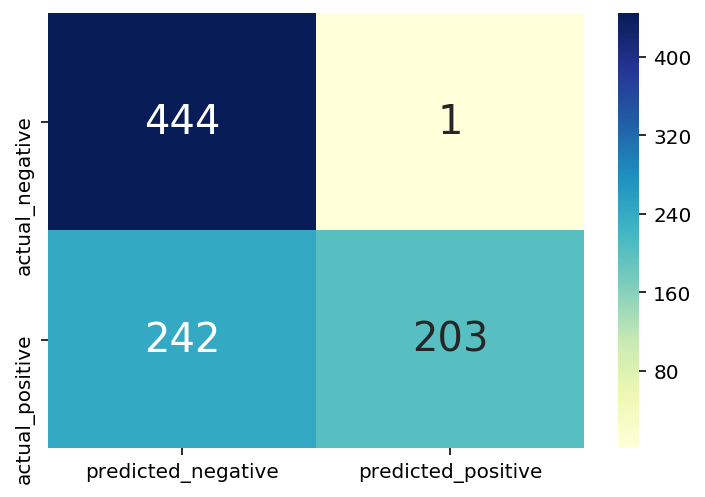

In [29]:
# Here's the heat map for the second Naive Bayes model
cm4 = conf_matrix(y_val_under, y_pred_cv2_nb)

In [30]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm3, cm4)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB1', 'NB2']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LogReg1,LogReg2,NB1,NB2
Accuracy,0.883,0.889,0.907,0.727
Precision,0.909,0.914,0.923,0.995
Recall,0.852,0.858,0.888,0.456
F1 Score,0.880,0.885,0.905,0.625


In [31]:
#Fit the 1st Random Forest model 
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()

classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
classifier.fit(X_train_cv1, y_train_under)
y_pred_cv1_rf = classifier.predict(X_val_cv1)


In [32]:
#Fit the 2nd Random Forest model 

classifier.fit(X_train_cv2, y_train_under)
y_pred_cv2_rf = classifier.predict(X_val_cv2)

true_neg is  404
false_pos is  41
false_neg is  68
true_pos is  377
accuracy is  0.878
precision is  0.902
recall is  0.847


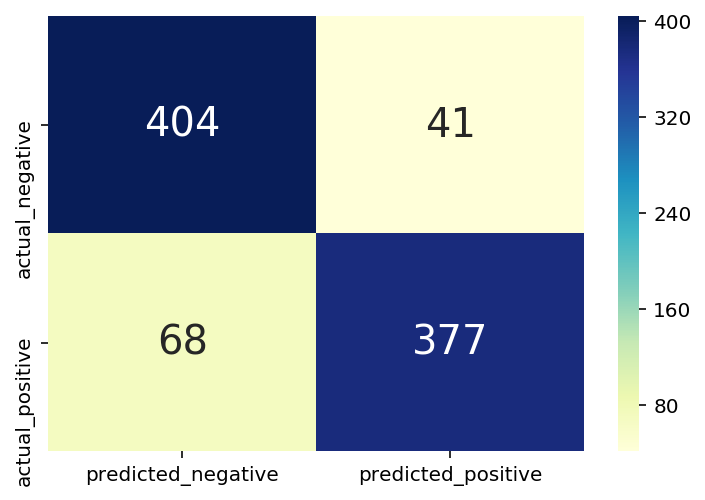

In [33]:
# Here's the heat map for the 1st Random Forest model 
cm5 = conf_matrix(y_val_under, y_pred_cv1_rf)

true_neg is  405
false_pos is  40
false_neg is  70
true_pos is  375
accuracy is  0.876
precision is  0.904
recall is  0.843


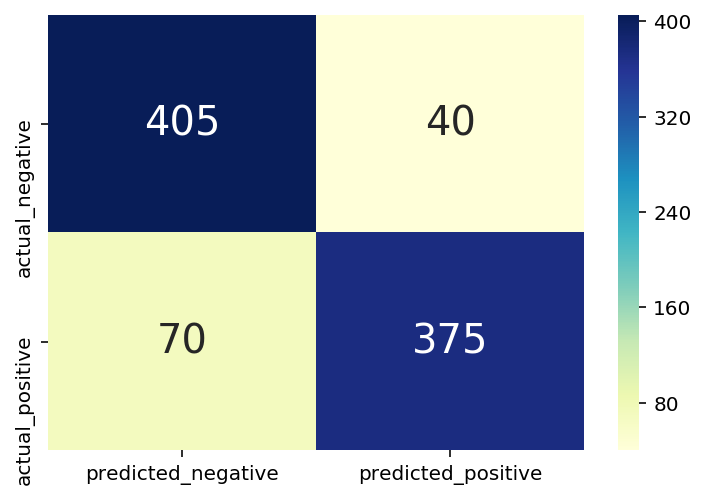

In [34]:
# Here's the heat map for the 2nd Random Forest model 
cm6 = conf_matrix(y_val_under, y_pred_cv2_rf)

In [35]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm5, cm6)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['RF1', 'RF2']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LogReg1,LogReg2,NB1,NB2,RF1,RF2
Accuracy,0.883,0.889,0.907,0.727,0.878,0.876
Precision,0.909,0.914,0.923,0.995,0.902,0.904
Recall,0.852,0.858,0.888,0.456,0.847,0.843
F1 Score,0.880,0.885,0.905,0.625,0.874,0.872


In [36]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train_under.ravel())
X_val_tfidf1  = tfidf1.transform(X_val_under.ravel())

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train_under.ravel())
X_val_tfidf2  = tfidf2.transform(X_val_under.ravel())

true_neg is  381
false_pos is  64
false_neg is  40
true_pos is  405
accuracy is  0.883
precision is  0.864
recall is  0.91


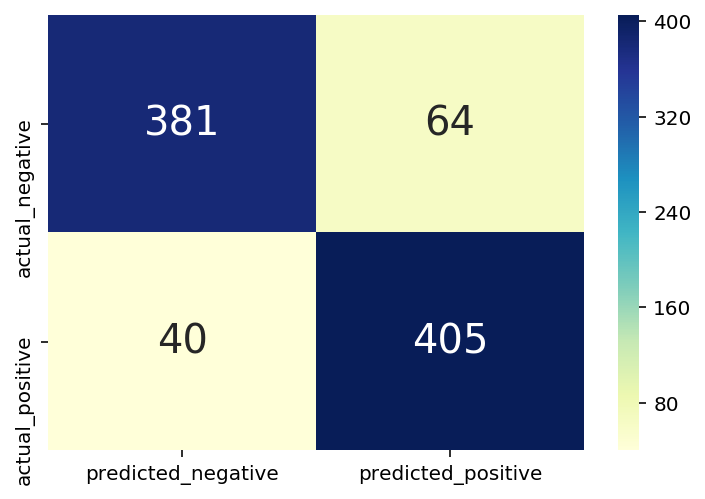

In [37]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train_under)
y_pred_tfidf1_lr = lr.predict(X_val_tfidf1)
cm7 = conf_matrix(y_val_under, y_pred_tfidf1_lr)

true_neg is  383
false_pos is  62
false_neg is  46
true_pos is  399
accuracy is  0.879
precision is  0.866
recall is  0.897


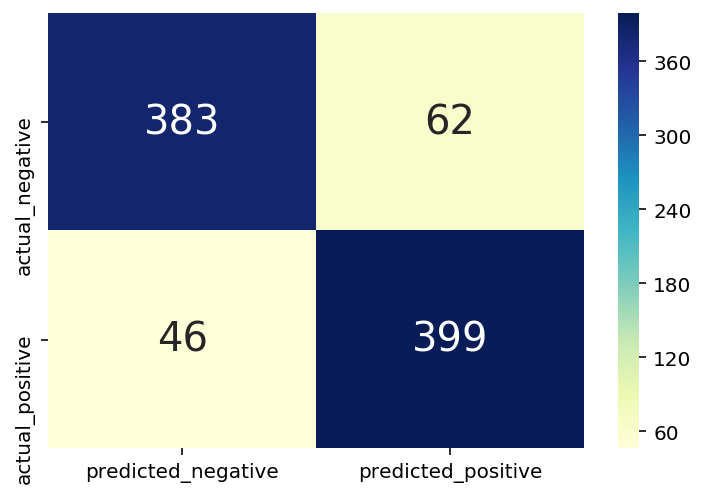

In [38]:
# Fit the second logistic regression on the TF-IDF data
lr.fit(X_train_tfidf2, y_train_under)
y_pred_tfidf2_lr = lr.predict(X_val_tfidf2)
cm8 = conf_matrix(y_val_under, y_pred_tfidf2_lr)

true_neg is  406
false_pos is  39
false_neg is  41
true_pos is  404
accuracy is  0.91
precision is  0.912
recall is  0.908


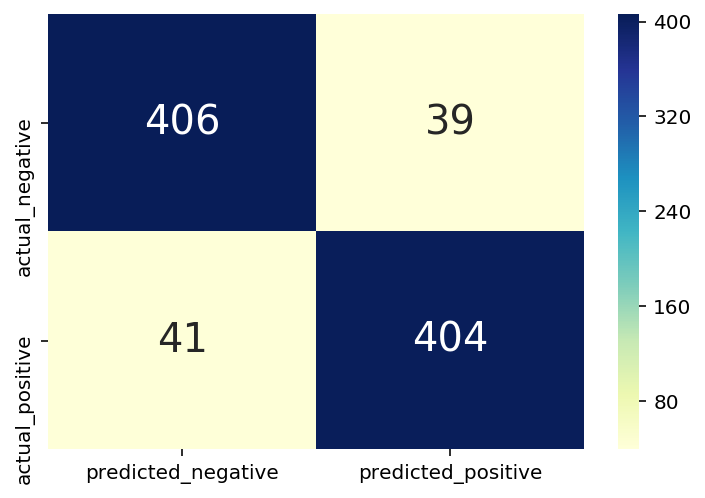

In [39]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1.toarray(), y_train_under)
y_pred_tfidf1_nb = mnb.predict(X_val_tfidf1)
cm9 = conf_matrix(y_val_under, y_pred_tfidf1_nb)

true_neg is  444
false_pos is  1
false_neg is  242
true_pos is  203
accuracy is  0.727
precision is  0.995
recall is  0.456


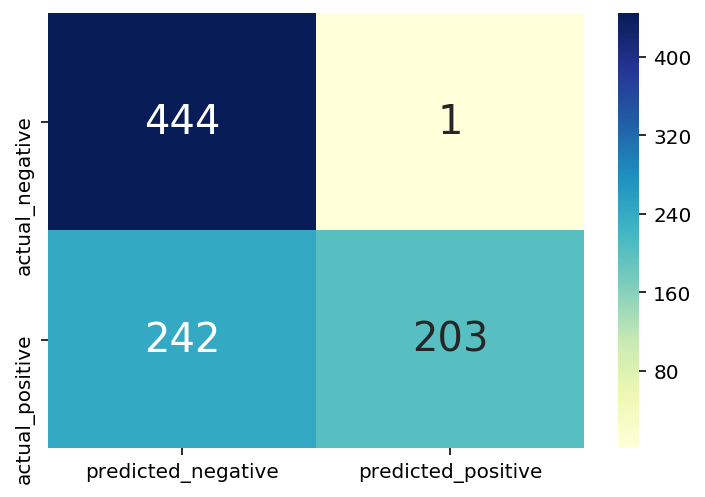

In [40]:
# Fit the second Naive Bayes model on the TF-IDF data
bnb.fit(X_train_tfidf2.toarray(), y_train_under)
y_pred_tfidf2_nb = bnb.predict(X_val_tfidf2)
cm10 = conf_matrix(y_val_under, y_pred_tfidf2_nb)

true_neg is  403
false_pos is  42
false_neg is  75
true_pos is  370
accuracy is  0.869
precision is  0.898
recall is  0.831


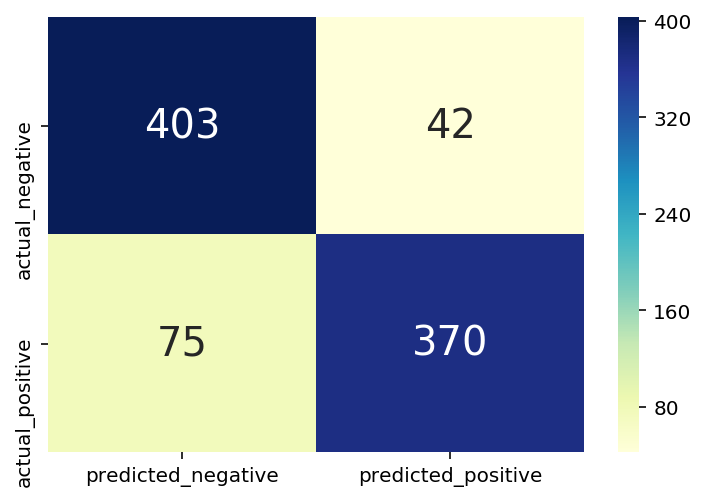

In [41]:
# Fit the first random forest model on the TF-IDF data
classifier.fit(X_train_tfidf1.toarray(), y_train_under)
y_pred_tfidf1_rf = classifier.predict(X_val_tfidf1)
cm11 = conf_matrix(y_val_under, y_pred_tfidf1_rf)

true_neg is  414
false_pos is  31
false_neg is  81
true_pos is  364
accuracy is  0.874
precision is  0.922
recall is  0.818


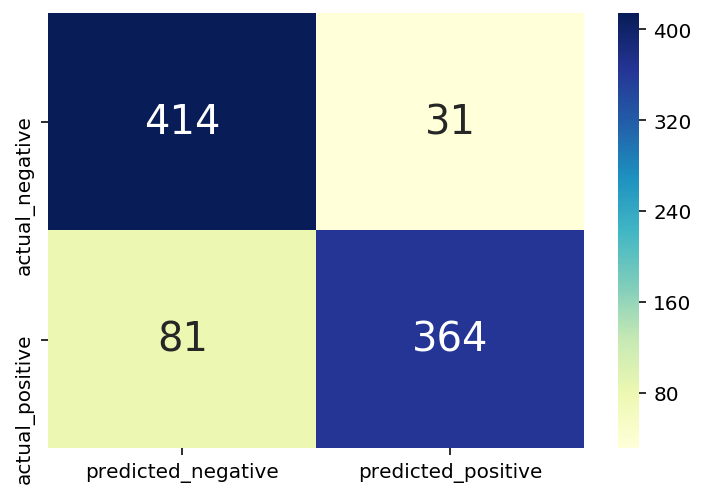

In [42]:
# Fit the second random forest model on the TF-IDF data
classifier.fit(X_train_tfidf2.toarray(), y_train_under)
y_pred_tfidf2_rf = classifier.predict(X_val_tfidf2)
cm12 = conf_matrix(y_val_under, y_pred_tfidf2_rf)

In [43]:
# Compile all of the error metrics into a dataframe for comparison for validation results
results_tf = pd.DataFrame(list(zip(cm7, cm8, cm9, cm10, cm11, cm12)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR1-TFIDF', 'LR2-TFIDF', 'NB1-TFIDF', 'NB2-TFIDF','RF1-TFIDF', 'RF2-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LogReg1,LogReg2,NB1,NB2,RF1,RF2,LR1-TFIDF,LR2-TFIDF,NB1-TFIDF,NB2-TFIDF,RF1-TFIDF,RF2-TFIDF
Accuracy,0.883,0.889,0.907,0.727,0.878,0.876,0.883,0.879,0.910,0.727,0.869,0.874
Precision,0.909,0.914,0.923,0.995,0.902,0.904,0.864,0.866,0.912,0.995,0.898,0.922
Recall,0.852,0.858,0.888,0.456,0.847,0.843,0.910,0.897,0.908,0.456,0.831,0.818
F1 Score,0.880,0.885,0.905,0.625,0.874,0.872,0.886,0.881,0.910,0.625,0.863,0.867


### Final Testing

In [44]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [45]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_break.ravel())
X_test_tfidf1  = tfidf1.transform(X_test.ravel())

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_break.ravel())
X_test_tfidf2  = tfidf2.transform(X_test.ravel())

true_neg is  2296
false_pos is  22
false_neg is  148
true_pos is  297
accuracy is  0.938
precision is  0.931
recall is  0.667


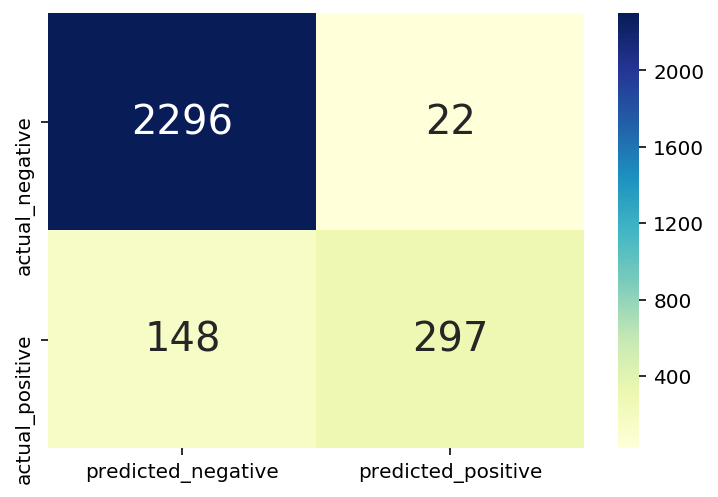

In [46]:
# Fit the 1st Logistic Regression model on the TF-IDF data
lr.fit(X_train_tfidf1, y_break)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm13 = conf_matrix(y_test, y_pred_tfidf1_lr)

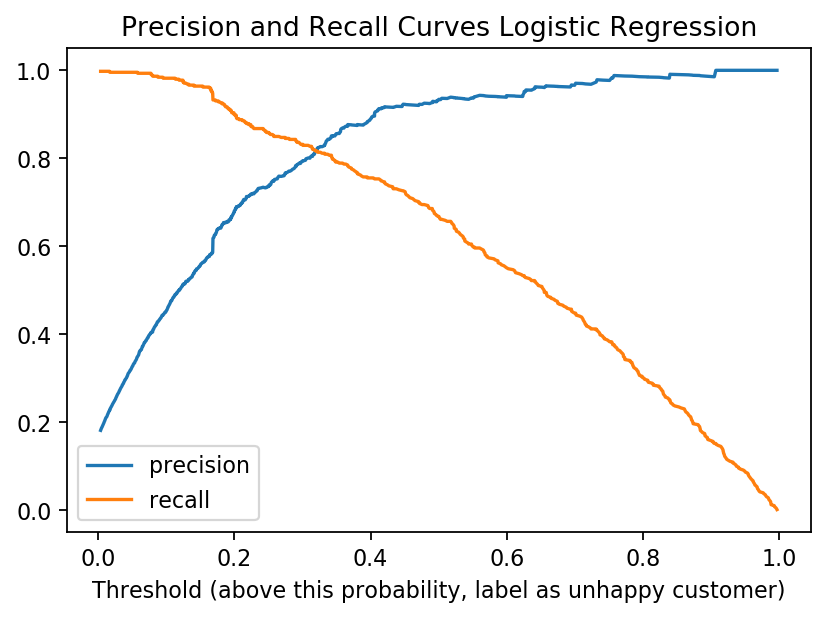

In [47]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lr.predict_proba(X_test_tfidf1)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as unhappy customer)');
plt.title('Precision and Recall Curves Logistic Regression');

true_neg is  2301
false_pos is  17
false_neg is  178
true_pos is  267
accuracy is  0.929
precision is  0.94
recall is  0.6


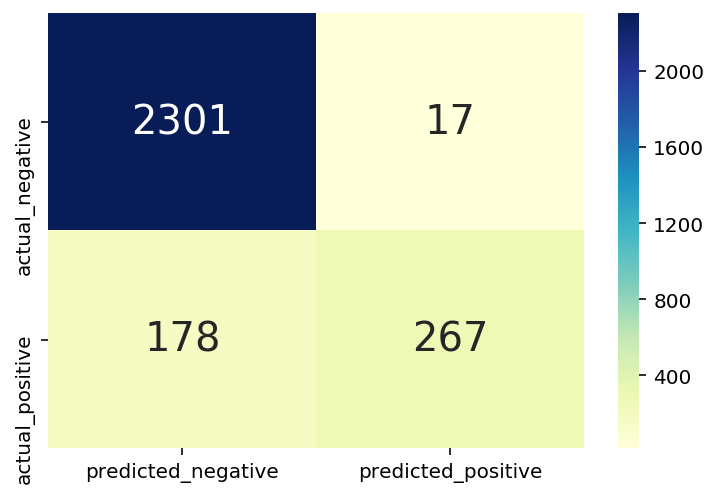

In [48]:
# Fit the second Logistic Regression model on the TF-IDF data
lr.fit(X_train_tfidf2, y_break)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)
cm14 = conf_matrix(y_test, y_pred_tfidf2_lr)

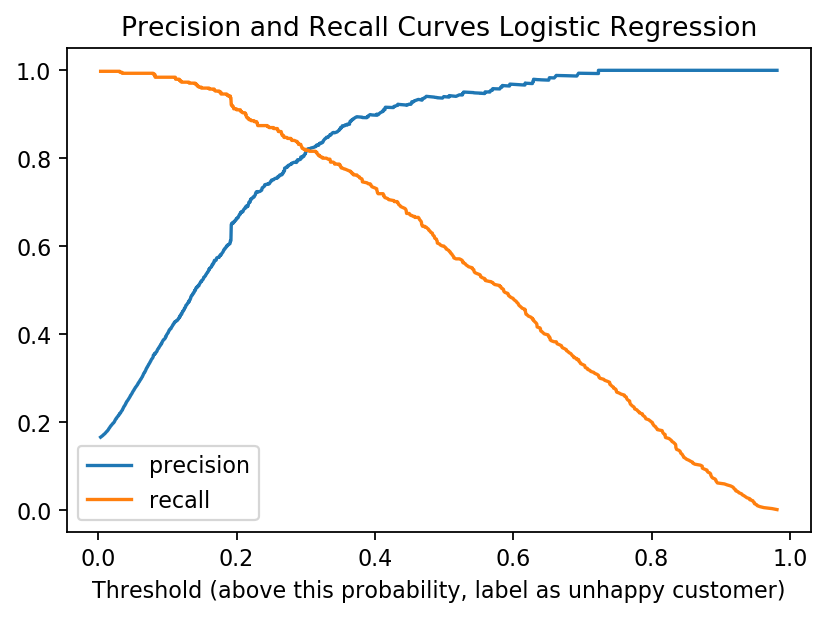

In [49]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lr.predict_proba(X_test_tfidf2)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as unhappy customer)');
plt.title('Precision and Recall Curves Logistic Regression');

true_neg is  2318
false_pos is  0
false_neg is  317
true_pos is  128
accuracy is  0.885
precision is  1.0
recall is  0.288


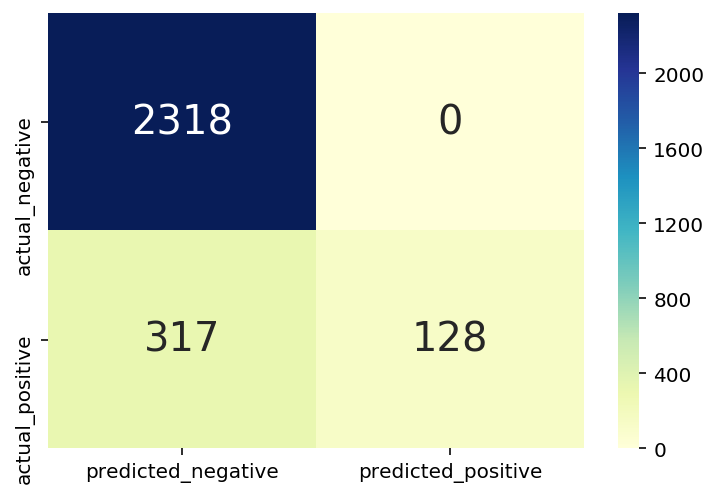

In [50]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1, y_break)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
cm15 = conf_matrix(y_test, y_pred_tfidf1_nb)

true_neg is  2316
false_pos is  2
false_neg is  384
true_pos is  61
accuracy is  0.86
precision is  0.968
recall is  0.137


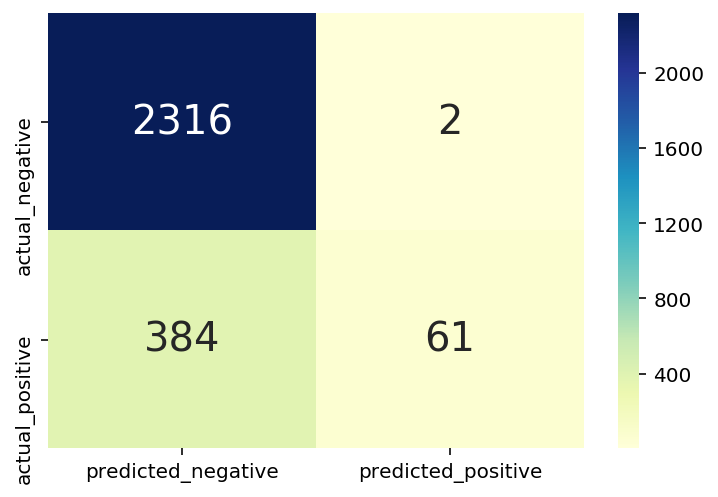

In [51]:
# Fit the second Naive Bayes model on the TF-IDF data
bnb.fit(X_train_tfidf2, y_break)
y_pred_tfidf2_nb = bnb.predict(X_test_tfidf2)
cm16 = conf_matrix(y_test, y_pred_tfidf2_nb)

true_neg is  2292
false_pos is  26
false_neg is  185
true_pos is  260
accuracy is  0.924
precision is  0.909
recall is  0.584


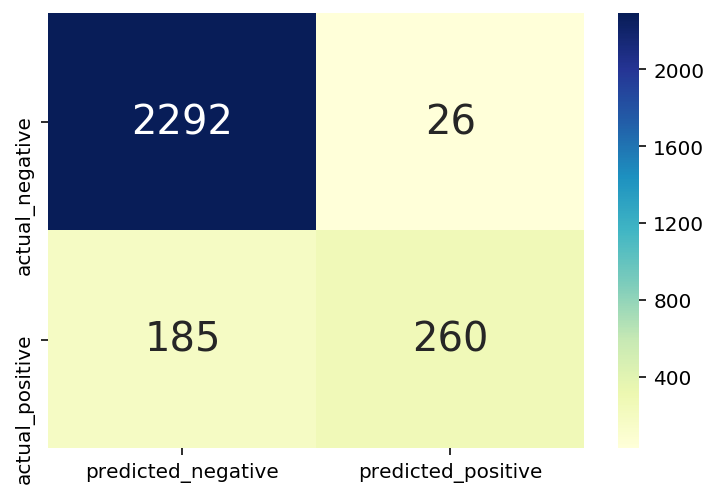

In [52]:
#Fit the 1st Random Forest model on the TF-IDF data
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()

classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
# classifier = RandomForestClassifier(random_state=seed, n_jobs=-1)
classifier.fit(X_train_tfidf1,y_break)
y_pred_tfidf1_rf = classifier.predict(X_test_tfidf1)
cm17 = conf_matrix(y_test, y_pred_tfidf1_rf)

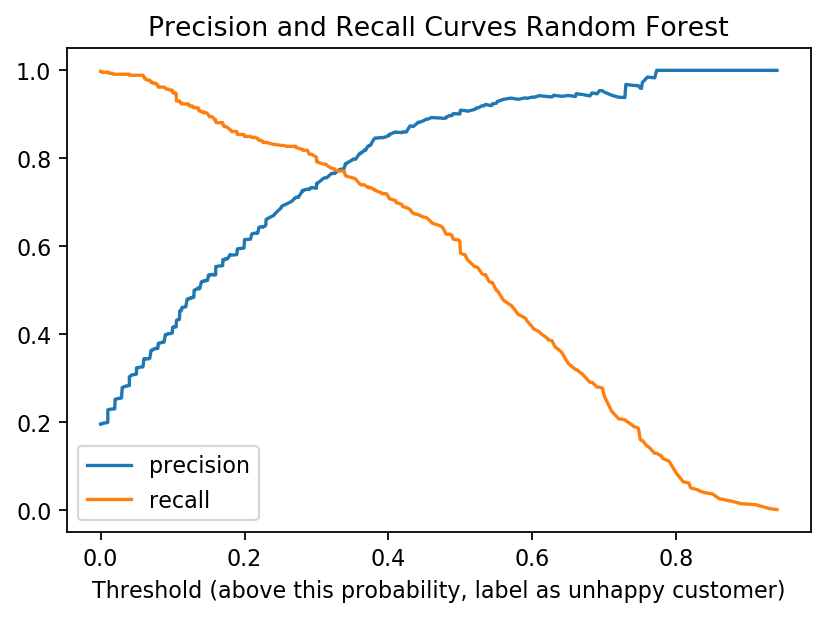

In [53]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, classifier.predict_proba(X_test_tfidf1)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as unhappy customer)');
plt.title('Precision and Recall Curves Random Forest');

true_neg is  2304
false_pos is  14
false_neg is  248
true_pos is  197
accuracy is  0.905
precision is  0.934
recall is  0.443


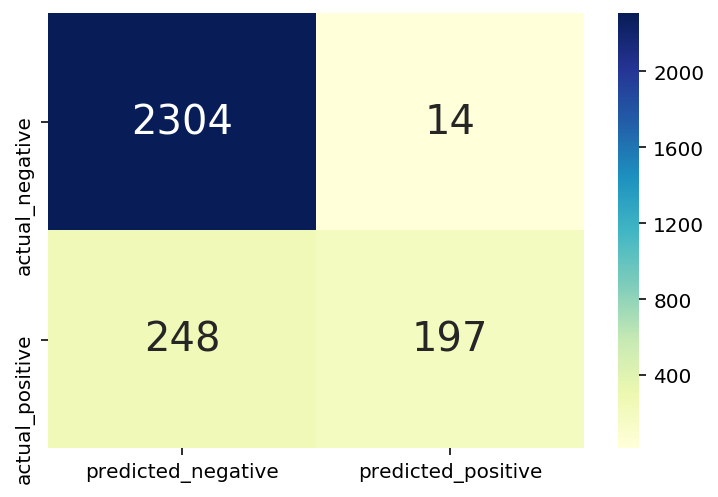

In [54]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
# classifier = RandomForestClassifier(random_state=seed, n_jobs=-1)
classifier.fit(X_train_tfidf2,y_break)
y_pred_tfidf2_rf = classifier.predict(X_test_tfidf2)
cm18 = conf_matrix(y_test, y_pred_tfidf2_rf)

Text(0.5, 1.0, 'Precision and Recall Curves Random Forest')

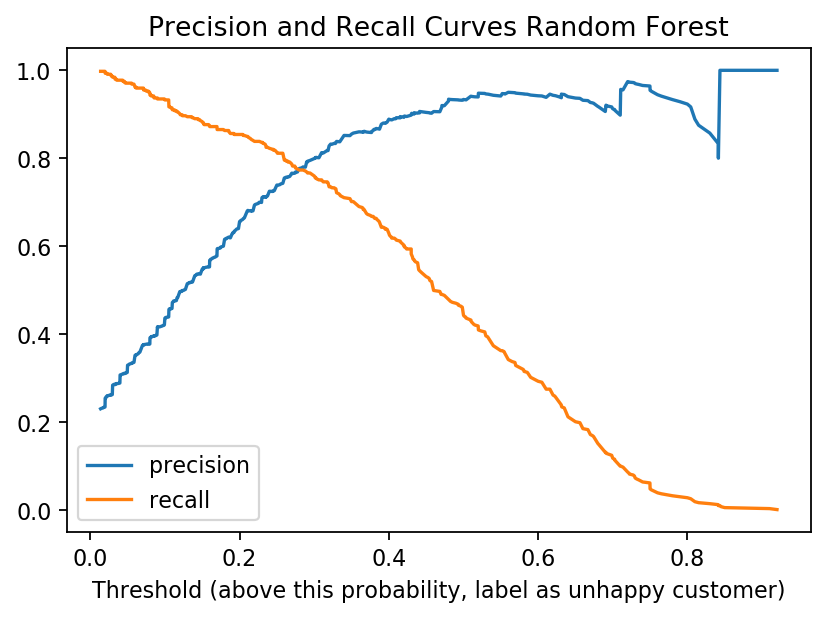

In [55]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, classifier.predict_proba(X_test_tfidf2)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as unhappy customer)');
plt.title('Precision and Recall Curves Random Forest')

In [56]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm13, cm14, cm15, cm16, cm17, cm18)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR1-TFIDF', 'LR2-TFIDF', 'NB1-TFIDF', 'NB2-TFIDF','RF1-TFIDF', 'RF2-TFIDF']
results

,LR1-TFIDF,LR2-TFIDF,NB1-TFIDF,NB2-TFIDF,RF1-TFIDF,RF2-TFIDF
Accuracy,0.938,0.929,0.885,0.860,0.924,0.905
Precision,0.931,0.940,1.000,0.968,0.909,0.934
Recall,0.667,0.600,0.288,0.137,0.584,0.443
F1 Score,0.777,0.732,0.447,0.240,0.711,0.601


In [57]:
#Fit the 1st Logistic Regression model on the TF-IDF data,# using the new threshold of 0.3

lr.fit(X_train_tfidf1,y_break)
y_pred_tfidf1_lr = (lr.predict_proba(X_test_tfidf1)[:,1] > 0.3)
#cm12 = conf_matrix(y_test, y_pred_tfidf2_rf)

print("Threshold of 0.3:")
print("Precision: {:6.4f},   Recall: {:6.4f},   F1: {:6.4f}".format(precision_score(y_test, y_pred_tfidf1_lr), 
                                                     recall_score(y_test, y_pred_tfidf1_lr),f1_score(y_test, y_pred_tfidf1_lr)))


Threshold of 0.3:
Precision: 0.7923,   Recall: 0.8315,   F1: 0.8114


In [58]:
#Fit the 2nd Logistic Regression model on the TF-IDF data,# using the new threshold of 0.3

lr.fit(X_train_tfidf2,y_break)
y_pred_tfidf2_lr = (lr.predict_proba(X_test_tfidf2)[:,1] > 0.3)
#cm12 = conf_matrix(y_test, y_pred_tfidf2_rf)

print("Threshold of 0.3:")
print("Precision: {:6.4f},   Recall: {:6.4f},   F1: {:6.4f}".format(precision_score(y_test, y_pred_tfidf2_lr), 
                                                     recall_score(y_test, y_pred_tfidf2_lr),f1_score(y_test, y_pred_tfidf2_lr)))


Threshold of 0.3:
Precision: 0.8125,   Recall: 0.8180,   F1: 0.8152


In [59]:
#Fit the 1st Random Forest model on the TF-IDF data,# using the new threshold of 0.3
classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
# classifier = RandomForestClassifier(random_state=seed, n_jobs=-1)
classifier.fit(X_train_tfidf1,y_break)
y_pred_tfidf1_rf = (classifier.predict_proba(X_test_tfidf1)[:,1] > 0.3)
#cm12 = conf_matrix(y_test, y_pred_tfidf2_rf)

print("Threshold of 0.3:")
print("Precision: {:6.4f},   Recall: {:6.4f},   F1: {:6.4f}".format(precision_score(y_test, y_pred_tfidf1_rf), 
                                                     recall_score(y_test, y_pred_tfidf1_rf),f1_score(y_test, y_pred_tfidf1_rf)))


Threshold of 0.3:
Precision: 0.7421,   Recall: 0.7955,   F1: 0.7679


In [60]:
#Fit the 2nd Random Forest model on the TF-IDF data,# using the new threshold of 0.3
classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
# classifier = RandomForestClassifier(random_state=seed, n_jobs=-1)
classifier.fit(X_train_tfidf2,y_break)
y_pred_tfidf2_rf = (classifier.predict_proba(X_test_tfidf2)[:,1] > 0.3)
#cm12 = conf_matrix(y_test, y_pred_tfidf2_rf)

print("Threshold of 0.3:")
print("Precision: {:6.4f},   Recall: {:6.4f},   F1: {:6.4f}".format(precision_score(y_test, y_pred_tfidf2_rf), 
                                                     recall_score(y_test, y_pred_tfidf2_rf),f1_score(y_test, y_pred_tfidf2_rf)))


Threshold of 0.3:
Precision: 0.7991,   Recall: 0.7596,   F1: 0.7788
